### Ομάδα 70: 
#### Χρήστος Παπαδημητρίου, el18017
#### Βαρθολομαίος Βαμβακάρης, el18072
#### Ζαχαρίας-Παύλος Αναστασιάδης, el18161

# Dataset : Connectionist Bench (Sonar, Mimes vs. Rocks)

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install seaborn
!pip install markdown
!pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Εισαγωγή & Επισκόπηση

In [1]:
import pandas as pd

df = pd.read_csv('sonar.all-data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [2]:
# check if we have any missing values

isNullArray, nullValsPresent = df.isnull(), False

for numCol in isNullArray:
    if True in isNullArray[numCol]:
        print("Missing Values in column: " + str(col))
        flag = True

if not nullValsPresent:
    print("There are no missing data in the Dataset")

There are no missing data in the Dataset


#### Σύντομη Παρουσίαση του Dataset
Το παραπάνω Dataset περιλαμβάνει δείγματα που αντιστοιχούν σε patterns συχνοτήτων. Αυτά τα patterns έχουν προκύψει από την αντανάκλαση σημάτων Sonar σε μεταλλικούς κυλίνδρους και σε πετρώματα. Συγκεκριμένα τα σήματα Sonar που χρησιμοποιήθηκαν είναι "Chirps" αυξανόμενης συχνότητας. Το Dataset περιλαμβάνει αποτελέσματα εκπομπής Sonar από ποικίλες γωνίες (aspect angles), μεχρί 90$^{o}$ για τους μεταλλικούς κυλίνδρους και μέχρι 180$^{o}$ για τα πετρώματα. 

Κάθε pattern περιγράφεται από 60 αριθμούς μεταξύ 0.0 και 1.0. Καθένας από αυτούς τους αριθμούς αντιστοιχεί στο ολοκλήρωμα της ενέργειας μιας συγκεκριμένης μπάντας συχνοτήτων για μια περίοδο στον χρόνο. 

Τα labels που συναντάμε στο dataset είναι 'R' για τα πετρώματα (Rocks) και 'Μ' για τους μεταλλικούς κυλίνδρους (Metal cylinder). 

Σημειώνεται ότι **δεν** χρειάστηκε να γίνουν μετατροπές στο αρχείο 'sonar.all-data' πριν την εισαγωγή του στο Notebook

#### Ακολουθούν κάποιες επιπλέον πληροφορίες για το Dataset:
* Το Dataset περιλαμβάνει 208 δείγματα. Κάθε δείγμα έχει 60 χαρακτηριστηκά. Το καθένα από αυτά είναι μία τιμή μεταξύ 0.0 και 1.1 (Το ολοκλήρωμα της ενέργειας που αναφέραμε παραπάνω) 
* Δεν υπάρχουν επικεφαλίδες, ούτε αρίθμηση γραμμών
* Οι ετικέτες των κλάσεων παίρνουν τιμές 'R' και 'Μ', όπως αναφέραμε παραπάνω. Βρίσκονται στην 61$^{η}$ κολόνα (index 60).
* Δεν υπάρχουν δείγματα με απουσιάζουσες τιμές
* Η κλαση R έχει 97 δείγματα (ποσοστό: 46.6%), ενώ η κλάση M έχει 111 δείγματα (ποσοστό: 53.4%). Σύμφωνα με το όριο 60%-40% πρόκειται για ισορροπημένο Dataset.

## Προετοιμασία

In [3]:
# split the dataframe into features matrix and labels column
features_df, labels_df = df.iloc[:,0:60], df.iloc[:,[60]]
print(labels_df.shape)
print(features_df.shape)

(208, 1)
(208, 60)


In [4]:
# turn features into a numpy array
features_np = features_df.values
features_np

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [5]:
# replace (R,M) with (0,1) in labels 

labels_df = labels_df.replace({'R':0}).replace({'M':1})
labels_np = labels_df.values.flatten()
labels_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split

# split our data into training and testing data
train, test, train_labels, test_labels = train_test_split(features_np, labels_np,
                                                          test_size=0.30,
                                                          random_state=42,
                                                          stratify = labels_np # keep proportions when spliting
                                                         )

## Ταξινόμηση

In [7]:
# import all classifiers 
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Επίδοση Out-Of-the-Box

In [47]:
# Dummy Classifier

dc_uniform = DummyClassifier(strategy="uniform", random_state=123)
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")

accuracy_scores_ootb = dict()
f1_scores_ootb = dict()
dummy_classifiers = [(dc_uniform, 'dc uniform'), (dc_constant_0, 'dc constant 0'),\
                       (dc_constant_1, 'dc constant 1'), (dc_most_frequent, 'dc most frequent')]

for (classifier, name) in dummy_classifiers:
    # train 
    model = classifier.fit(train, train_labels)
    # predict for test data
    preds = classifier.predict(test)
    # calculate accuracy
    accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
    # calculate f1 scores
    f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

In [48]:
# Gaussian Naive Bayes Classifier

name = 'gnb'
gnb = GaussianNB()
#train
model = gnb.fit(train, train_labels)
# predict for test data
preds = gnb.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
# f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)
f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

In [49]:
# K-Nearest-Neighbours

name = 'knn'
knn = KNeighborsClassifier()
# train
knn.fit(train, train_labels)
# predict for test data
preds = knn.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
# f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)
f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

In [50]:
name = 'logisticRegression'
logReg = LogisticRegression()

# train
logReg.fit(train, train_labels)
# predict for test data
preds = logReg.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
# f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)
f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

**Παρουσίαση Επίδοσης Out-of-the-Box:**

In [51]:
# print results
from IPython.display import display, Markdown, Latex

disp = """
| Classifier | Accuracy | F1-score |
| :-: | :-: | :-: |
"""

for name in accuracy_scores_ootb.keys():
    disp += "|"+name+"|"+str(accuracy_scores_ootb[name])+"|"+str(f1_scores_ootb[name])+"|\n"

display(Markdown(disp))



| Classifier | Accuracy | F1-score |
| :-: | :-: | :-: |
|dc uniform|0.619|0.613|
|dc constant 0|0.46|0.0|
|dc constant 1|0.54|0.701|
|dc most frequent|0.54|0.701|
|gnb|0.762|0.769|
|knn|0.794|0.822|
|logisticRegression|0.778|0.794|


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# functions to plot bar charts

def plotBarChart(x, ylist, cols, labs, tit, xlab, ylab):
    plt.clf()
    xaxis = np.arange(len(x))

    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    fig, ax = plt.subplots(figsize=(15,8))
    
    for i in range(len(ylist)):
        fig = plt.bar(xaxis+offset[i], ylist[i], color=cols[i], label=labs[i], width=0.2)

    # correct the xticklabels
    ax.set_xticks(xaxis)
    ax.set_xticklabels(x)
    
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(tit)
    
def plotBarChartDoubleAxes(x,ylist,cols,labs,tit,xlab,ylabList):
    xaxis = np.arange(len(x))
    
    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    
    
    fig, ax0 = plt.subplots(figsize=(15,9))
    # create second set of axes with same x axis
    ax1 = ax0.twinx()
    
    ax0.set_yticks([i/10 for i in range(11)])
    # plot       
    ax0.bar(xaxis+offset[0], ylist[0], color=cols[0], label=labs[0], width=0.2)
    ax1.bar(xaxis+offset[1], ylist[1], color=cols[1], label=labs[1], width=0.2)
    
    # ylabels
    ax0.set_ylabel(ylabList[0])
    ax1.set_ylabel(ylabList[1])
    
    # correct the xticklabels
    ax0.set_xticks(xaxis)
    ax0.set_xticklabels(x)
    
    
    ax0.legend(loc='upper right', bbox_to_anchor=(0.95,0.99))
    ax1.legend(loc='upper right', bbox_to_anchor=(0.95,0.94))
    ax0.set_xlabel(xlab)
    plt.title(tit)   

<Figure size 432x288 with 0 Axes>

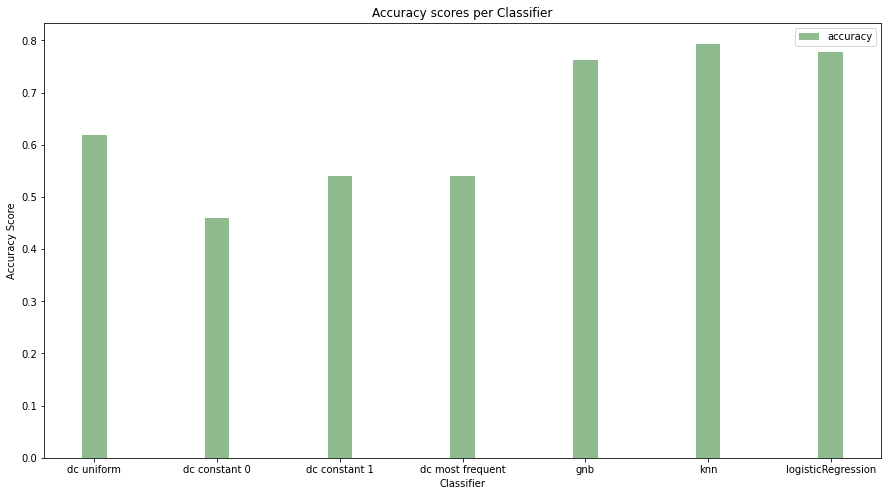

In [53]:
xaxis, yaxis = [], []
for (key, val) in accuracy_scores_ootb.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['darkseagreen'], ['accuracy'],\
             'Accuracy scores per Classifier', 'Classifier', 'Accuracy Score')

<Figure size 432x288 with 0 Axes>

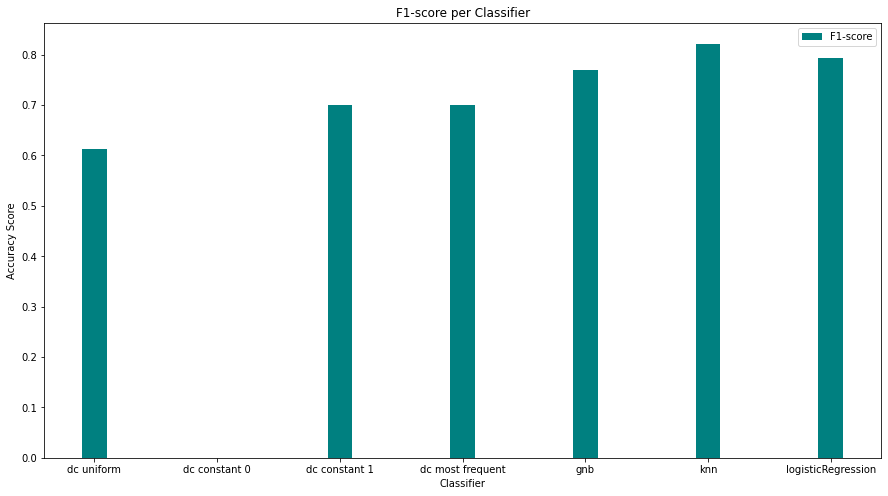

In [54]:
xaxis, yaxis = [], []
for (key, val) in f1_scores_ootb.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['teal'], ['F1-score'],\
             'F1-score per Classifier', 'Classifier', 'Accuracy Score')

**Σχολιασμός της Out-of-the-Box συμπεριφοράς**

Οι Constant Dummy Classifiers έχουν Accuracy που ακολουθεί το ποσοστό εμφάνισης της κάθε κλάσης, όπως άλλωστε είναι αναμενόμενο. Επίσης, εδώ ο 1-constant Dummy πετυχαίνει και σχετικά καλό F1-score (είναι κοντινό με το καλύτερο F1-score που πετυχαίνουμε ootb). Επίσης, λόγω των πολύ ισορροπημένων κλάσεων στο Dataset (έχουμε πολύ κοντινό πλήθος δειγμάτων για τις δύο κλάσεις), εδώ ο Uniform Dummy πετυχαίνει καλύτερο Accuracy από τους Constant Dummy Classifiers.

Όσον αφορά τους GNB, Knn και Logistic Regression Classifiers, βλέπουμε ότι έχουν σχετικά υψηλή επίδοση (σημαντικά καλύτερη από όλους τους Dummy) ακόμα και χωρίς να έχει πραγματοποιηθεί προεπεξεργασία και βελτιστοποίηση. Αυτό μπορεί να εξηγηθεί σε έναν βαθμό από τα χαρακτηριστικά του Dataset. Αρχικά, αυτό είναι ισορροπημένο από πλευράς κλάσεων. Επιπλέον, οι τιμές των χαρακτηριστικών σε όλες τις στήλες είναι αριθμητικές και διατεταγμένες, ενώ βρίσκονται ήδη μεταξύ 0 και 1 (είναι επί της ουσίας κανονικοποιημένες). Αυτά είναι γνωρίσματα τα οποία βελτιώνουν γενικά την επίδοση των ταξινομητών και υπό άλλες συνθήκες προσπαθούμε να τα πετύχουμε μέσω της διαδικασίας προεπεξεργασίας. Επομένως, η καλή επίδοση των ootb ταξινομητών οφείλεται σε έναν βαθμό στην καλή ποιότητα των δεδομένων μας. Με βάση τις παραπάνω παρατηρήσεις μας, αξίζει επίσης να σημειώσουμε ότι δεν περιμένουμε η επιπλέον προεπεξεργασία που θα πραγματοποιήσουμε να έχει θεαματικά αποτελέσματα στην επίδοση, δεδομένου ότι το Dataset είναι ήδη σε _"σε καλή κατάσταση"_. Για να σχολιάσουμε συγκεκριμένα την επίδοση, ως προς το accuracy ο GNB, ο Knn και ο Logistic Regression έχουν πολλή κοντινές επιδόσεις, με τον Knn να είναι ο καλύτερος με μικρή διαφορά. Για την μετρική F1-score ο Knn ξεχωρίζει ως ο καλύτερος με μεγαλύτερη διαφορά, ενώ οι άλλοι δύο πετυχαίνουν κοντινό αποτέλεσμα.

## Βελτιστοποίηση

In [55]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

import time

cv = StratifiedKFold(n_splits=10, shuffle= True, random_state=42)

**Προεπεξεργασία**

Σε επίπεδο προεπεξεργασίας θα χρησιμοποιήσουμε τις εξής τεχνικές:
* **Μείωση διαστατικότητας**. Για αυτόν τον σκοπό θα πειραματιστούμε με Variance Threshold και PCA. 

* **Εξισορρόπηση των κλάσεων**. Για αυτόν τον σκοπό θα χρησιμοποιήσουμε Random oversampling.

* **Κανονικοποίηση**. Για αυτόν τον σκοπό θα χρησιμοποιήσουμε standard scaling.

Παρακάτω θα εντάξουμε αυτες τις τεχνικές στα πλαίσια γενικότερων Pipelines.

In [56]:
train_variance = train.var(axis=0)
# print(train_variance)

# maximum variance
max_variance = np.max(train_variance)
max_variance

0.07404667920760999

**Εύρεση Βέλτιστων Υπερπαραμέτρων**
**(Διασταυρούμενη Επικύρωση με Αναζήτηση Πλέγματος)**

Για κάθε ταξινομητή και κάθε μετρική θα κάνουμε πρώτα μία αναζήτηση σε μεγαλύτερα εύρη υπερπαραμέτρων για να εντοπίσουμε _καλές περιοχές_. Στη συνέχεια, με βάση τα απότελέσματά μας στην προηγούμενη φάση θα κάνουμε μία πιο συγκεκριμένη αναζήτηση, για να καταλήξουμε στον βέλτιστο ταξινομητή κάθε περίπτωσης.

In [57]:
accuracy_scores_best = dict()
f1_scores_best = dict()
accuracy_test_time = dict()
accuracy_train_time = dict()
f1_test_time = dict()
f1_train_time = dict()
cnf_matrices = dict()

### *Gaussian Naive Bayes*

**GNB - Βελτιστοποίηση ως προς το F1-score**

In [58]:
# create pipeline to perform preprocessing and fitting
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

In [59]:
# parameters for the grid

# variance thresholds
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

# number of components for pca 
# n_components = [8,9,10,11,12,13,17,18,19,20]
n_components = [5,10,20,30,40,45]

#smoothing
smoothing = np.logspace(0,-12, num=15)

In [60]:
estimator_f1_score_gnb = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds,
                              pca__n_components=n_components,
                              gnb__var_smoothing = smoothing
                             ),
                         cv=cv,
                         scoring='f1_macro',
                         n_jobs=-1)

In [61]:
# find best parameters according to f1-score metric
estimator_f1_score_gnb.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()), ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gnb__var_smoothing': array([1.00000000e+00, 1.38949549e-01, 1.93069773e-02, 2.68269580e-03,
       3.72759372e-04, 5.17947468e-05, 7.19685673e-06, 1.00000000e-06,
       1.38949549e-07, 1.93069773e-08, 2.68269580e-09, 3.72759372e-10,
       5.17947468e-11, 7.19685673e-12, 1.00000000e-12]),
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [62]:
print(estimator_f1_score_gnb.best_params_)
# print('Best f1-score: %s' % estimator_f1_score_gnb.best_score_)

{'gnb__var_smoothing': 0.002682695795279727, 'pca__n_components': 10, 'selector__threshold': 7.404667920760998e-05}


Με βάση τα παραπάνω αποτελέσματα κάνουμε μία πιό στενή αναζήτηση στην περιοχή των υπερπαραμέτρων που υποδεικνύει η προηγούμενη αναζητηση.

In [63]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

# parameters for the grid
vthresholds_narrow = np.logspace(-4, -6, num=20)
n_components_narrow = [8,9,10,11,12,13]
smoothing_narrow = np.logspace(-2,-4, num=20)

estimator_f1_score_gnb_narrow = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds_narrow,
                              pca__n_components=n_components_narrow,
                              gnb__var_smoothing = smoothing_narrow
                             ),
                         cv=cv,
                         scoring='f1_macro',
                         n_jobs=-1)
start_time = time.time()
estimator_f1_score_gnb_narrow.fit(train, train_labels)
f1_train_time['gnb'] = (time.time()-start_time)

In [64]:
print(estimator_f1_score_gnb_narrow.best_params_)
# print('Best f1-score: %s' % estimator_f1_score_gnb_narrow.best_score_)

{'gnb__var_smoothing': 0.0003359818286283781, 'pca__n_components': 10, 'selector__threshold': 4.8329302385717524e-05}


In [65]:
import time

# test the best model
gnb_f1_best = estimator_f1_score_gnb_narrow.best_estimator_

# find testing time
start_time = time.time()
preds = gnb_f1_best.predict(test)
f1_test_time['gnb'] = (time.time()-start_time)


# calculate f1 scores
f1_scores_best['gnb'] = round(f1_score(test_labels, preds),3)
print(f1_scores_best['gnb'])

0.787


**GNB - Βελτιστοποίηση ως προς το Accuracy**

In [66]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

# parameters for the grid
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]
n_components = [5,10,20,30,40,45]
smoothing = np.logspace(0,-12, num=15)

estimator_accuracy_gnb = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds,
                              pca__n_components=n_components,
                              gnb__var_smoothing = smoothing
                             ),
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_gnb.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()), ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gnb__var_smoothing': array([1.00000000e+00, 1.38949549e-01, 1.93069773e-02, 2.68269580e-03,
       3.72759372e-04, 5.17947468e-05, 7.19685673e-06, 1.00000000e-06,
       1.38949549e-07, 1.93069773e-08, 2.68269580e-09, 3.72759372e-10,
       5.17947468e-11, 7.19685673e-12, 1.00000000e-12]),
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='accuracy')

In [67]:
print(estimator_accuracy_gnb.best_params_)
# print('Best accuracy: %s' % estimator_accuracy_gnb.best_score_)

{'gnb__var_smoothing': 1e-12, 'pca__n_components': 10, 'selector__threshold': 7.404667920760998e-05}


Με βάση τα παραπάνω αποτελέσματα προχωράμε σε μία πιο συγκεκριμένη αναζήτηση:

In [68]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

# parameters for the grid
vthresholds_narrow = np.logspace(-4,-6,num=15)

n_components_narrow = [8,9,10,11,12,13]

smoothing_narrow = np.logspace(-11,-13, num=20)

estimator_accuracy_gnb_narrow = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds_narrow,
                              pca__n_components=n_components_narrow,
                              gnb__var_smoothing = smoothing_narrow
                             ),
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

start_time = time.time()
# find best parameters according to accuracy metric
estimator_accuracy_gnb_narrow.fit(train, train_labels)
accuracy_train_time['gnb'] = (time.time()-start_time)

In [69]:
import time

# test the best model
gnb_accuracy_best = estimator_accuracy_gnb_narrow.best_estimator_


# find testing time
start_time = time.time()
preds = gnb_accuracy_best.predict(test)
accuracy_test_time['gnb'] = (time.time()-start_time)

# calculate accuracy
accuracy_scores_best['gnb'] = round(accuracy_score(test_labels, preds),3)
print(accuracy_scores_best['gnb'])

# cnf matrix
cnf_matrices['gnb'] = confusion_matrix(test_labels, preds)

0.81


### *K-Nearest-Neighbours*

**Knn - Βελτιστοποίηση ως προς το F1-score**

In [70]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

# variance thresholds
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000, max_variance/100]

# number of components for pca 
n_components = [5,10,20,30,40,45]

# number of neighbours
k = [1,3,5,7]

estimator_f1_score_knn = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components, 
                              kNN__n_neighbors=k
                             ), 
                         cv=cv, 
                         scoring='f1_macro',
                         n_jobs=-1)

# find best parameters according to f1-score metric
estimator_f1_score_knn.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [1, 3, 5, 7],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [71]:
print(estimator_f1_score_knn.best_params_)
# print('Best f1-score: %s' % estimator_f1_score_knn.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}


Προχωράμε σε μιά πιο στενή αναζήτηση:

In [72]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

# grid search parameters
vthresholds_narrow = list(set([0]) | set(np.logspace(-10,-14,num=15)))
n_components_narrow = [16,17,18,19,20,21,22,23,24]
k_narrow = [1,2,3,4]

estimator_f1_score_knn_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds_narrow, 
                              pca__n_components=n_components_narrow, 
                              kNN__n_neighbors=k_narrow
                             ), 
                         cv=cv, 
                         scoring='f1_macro',
                         n_jobs=-1)

start_time = time.time()
# find best parameters according to f1-score metric
estimator_f1_score_knn_narrow.fit(train, train_labels)
f1_train_time['knn'] = (time.time()-start_time)

In [73]:
print(estimator_f1_score_knn_narrow.best_params_)
# print('Best f1-score: %s' % estimator_f1_score_knn_narrow.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}


In [74]:
import time

# test best model
knn_f1_best = estimator_f1_score_knn_narrow.best_estimator_

# find testing time
start_time = time.time()
preds = knn_f1_best.predict(test)
f1_test_time['knn'] = (time.time()-start_time)

f1_scores_best['knn'] = round(f1_score(test_labels, preds),3)
print(f1_scores_best['knn'])

0.886


**Knn - Βελτιστοποίηση ως προς το Accuracy**

In [75]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000, max_variance/100]
n_components = [5,10,20,30,40,45]
k = [1,3,5,7]

estimator_accuracy_knn = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components, 
                              kNN__n_neighbors=k
                             ), 
                         cv=cv, 
                         scoring='accuracy',
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_knn.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [1, 3, 5, 7],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='accuracy')

In [76]:
print(estimator_accuracy_knn.best_params_)
# print('Best accuracy: %s' % estimator_accuracy_knn.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}


Κάνουμε μιά πιο στενή αναζήτηση που πληροφορείται από τα απότελέσματα της παραπάνω:

In [77]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

vthresholds_narrow = list(set([0]) | set(np.logspace(-10,-14,num=15)))
n_components_narrow = [16,17,18,19,20,21,22,23]
k_narrow = [1,2,3]

estimator_accuracy_knn_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds_narrow, 
                              pca__n_components=n_components_narrow, 
                              kNN__n_neighbors=k_narrow
                             ), 
                         cv=cv, 
                         scoring='accuracy',
                         n_jobs=-1)

start_time = time.time()
# find best parameters according to accuracy metric
estimator_accuracy_knn_narrow.fit(train, train_labels)
accuracy_train_time['knn'] = (time.time()-start_time)

In [78]:
print(estimator_accuracy_knn_narrow.best_params_)
# print('Best accuracy: %s' % estimator_accuracy_knn_narrow.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}


In [79]:
import time

# test the best model
knn_accuracy_best = estimator_accuracy_knn_narrow.best_estimator_

# find testing time
start_time = time.time()
preds = knn_accuracy_best.predict(test)
accuracy_test_time['knn'] = (time.time()-start_time)

# calculate accuracy
accuracy_scores_best['knn'] = round(accuracy_score(test_labels, preds),3)

# cnf matrix
cnf_matrices['knn'] = confusion_matrix(test_labels, preds)
print(accuracy_scores_best['knn'])

0.873


### *Logistic Regression*

**Logistic Regression - Βελτιστοποίηση ως προς το F1-Score**

In [80]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

# variance thresholds
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

# number of components for pca 
n_components = [5,10,20,30,40,45]


# max iterations 
iterations = [70,80,100]

# logistic regression classifier parameters
C = np.logspace(-4, 2, num=15)

logReg_solver = ['liblinear','sag','saga']

estimator_f1_score_logReg = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components,
                              logReg__C=C,
                              logReg__solver=logReg_solver,
                              logReg__max_iter=iterations
                             ),
                         cv=cv, 
                         scoring='f1_macro', 
                         n_jobs=-1)

# find best parameters according to f1-score metric
estimator_f1_score_logReg.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('logReg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logReg__C': array([1.00000000e-04, 2.68269580e-04, 7.19685673e-04, 1.93069773e-03,
       5.179474...
       2.68269580e-01, 7.19685673e-01, 1.93069773e+00, 5.17947468e+00,
       1.38949549e+01, 3.72759372e+01, 1.00000000e+02]),
                         'logReg__max_iter': [70, 80, 100],
                         'logReg__solver': ['liblinear', 'sag', 'saga'],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [81]:
print(estimator_f1_score_logReg.best_params_)
# print("Best F1-score: %s" % estimator_f1_score_logReg.best_score_)

{'logReg__C': 0.2682695795279725, 'logReg__max_iter': 80, 'logReg__solver': 'saga', 'pca__n_components': 10, 'selector__threshold': 0.0007404667920760999}


Προχωράμε σε μιά πιο στενή αναζήτηση:

In [82]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

vthresholds_narrow = np.logspace(-3,-5,num=20)
n_components_narrow = [8,9,10,11,12,13]
iterations_narrow = [70,80,100]
C_narrow = [i/100 for i in range(1,41,2)]
# logReg_solver_narrow = ['lbfgs','newton-cg','liblinear','sag','saga']
logReg_solver_narrow = ['sag', 'saga']


estimator_f1_score_logReg_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components_narrow,
                              logReg__C=C_narrow,
                              logReg__solver=logReg_solver_narrow,
                              logReg__max_iter=iterations_narrow
                             ),
                         cv=cv, 
                         scoring='f1_macro', 
                         n_jobs=-1)

start_time = time.time()
# find best parameters according to f1-score metric
estimator_f1_score_logReg_narrow.fit(train, train_labels)
f1_train_time['logisticRegression'] = (time.time()-start_time)

In [83]:
print(estimator_f1_score_logReg_narrow.best_params_)
# print("Best F1-score: %s" % estimator_f1_score_logReg_narrow.best_score_)

{'logReg__C': 0.23, 'logReg__max_iter': 80, 'logReg__solver': 'sag', 'pca__n_components': 12, 'selector__threshold': 0.0007404667920760999}


In [84]:
import time

# test best model
logReg_f1_best = estimator_f1_score_logReg_narrow.best_estimator_

# find testing time
start_time = time.time()
preds = logReg_f1_best.predict(test)
f1_test_time['logisticRegression'] = (time.time()-start_time)

f1_scores_best['logisticRegression'] = round(f1_score(test_labels, preds),3)
print(f1_scores_best['logisticRegression'])

0.8


**Logistic Regression - Βελτιστοποίηση ως προς το Accuracy**

In [85]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]
n_components = [5,10,20,30,40,45]
iterations = [70,80,100]
C = np.logspace(-4, 2, num=15)

logReg_solver = ['liblinear','sag','saga']

estimator_accuracy_logReg = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components,
                              logReg__C=C,
                              logReg__solver=logReg_solver,
                             ),
                         cv=cv, 
                         scoring='accuracy', 
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_logReg.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('logReg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logReg__C': array([1.00000000e-04, 2.68269580e-04, 7.19685673e-04, 1.93069773e-03,
       5.179474...-01,
       2.68269580e-01, 7.19685673e-01, 1.93069773e+00, 5.17947468e+00,
       1.38949549e+01, 3.72759372e+01, 1.00000000e+02]),
                         'logReg__solver': ['liblinear', 'sag', 'saga'],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='accuracy')

In [86]:
print(estimator_accuracy_logReg.best_params_)
# print("Best Accuracy: %s" % estimator_accuracy_logReg.best_score_)

{'logReg__C': 37.27593720314938, 'logReg__solver': 'saga', 'pca__n_components': 10, 'selector__threshold': 0.0007404667920760999}


Προχωράμε σε μιά πιο στενή αναζήτηση:

In [87]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

vthresholds = np.logspace(-3,-5,num=20)
n_components_narrow = [7,8,9,10,11,12,13,14]
iterations_narrow = [70,80,100]
C_narrow = [i for i in range(11,81,2)]
logReg_solver_narrow = ['sag', 'saga']

estimator_accuracy_logReg_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds_narrow, 
                              pca__n_components=n_components_narrow,
                              logReg__C=C_narrow,
                              logReg__solver=logReg_solver_narrow,
                             ),
                         cv=cv, 
                         scoring='accuracy', 
                         n_jobs=-1)

start_time = time.time()
# find best parameters according to accuracy metric
estimator_accuracy_logReg_narrow.fit(train, train_labels)
accuracy_train_time['logisticRegression'] = (time.time()-start_time)

In [88]:
print(estimator_accuracy_logReg_narrow.best_params_)
# print("Best Accuracy: %s" % estimator_accuracy_logReg_narrow.best_score_)

{'logReg__C': 31, 'logReg__solver': 'sag', 'pca__n_components': 14, 'selector__threshold': 4.281332398719396e-05}


In [89]:
import time

# test best model
logReg_accuracy_best = estimator_accuracy_logReg_narrow.best_estimator_

# find testing time
start_time = time.time()
preds = logReg_accuracy_best.predict(test)
accuracy_test_time['logisticRegression'] = (time.time()-start_time)

# calculate accuracy
accuracy_scores_best['logisticRegression'] = round(accuracy_score(test_labels, preds),3)

# cnf matrix
cnf_matrices['logisticRegression'] = confusion_matrix(test_labels, preds)
print(accuracy_scores_best['logisticRegression'])

0.794


## Αποτελέσματα & Συμπεράσματα

In [101]:
# calculate relative metrics
accuracy_scores_improvement = dict()
f1_scores_improvement = dict()
accuracy_scores_improvement_dummy = dict()
f1_scores_improvement_dummy = dict()

for name in accuracy_scores_best.keys():
    accuracy_scores_improvement[name] =\
        round((accuracy_scores_best[name]-accuracy_scores_ootb[name])*100/accuracy_scores_ootb[name],3)
    accuracy_scores_improvement_dummy[name] =\
        round((accuracy_scores_best[name]-accuracy_scores_ootb['dc uniform'])*100/accuracy_scores_ootb['dc uniform'],3)
    f1_scores_improvement[name] = \
        round((f1_scores_best[name]-f1_scores_ootb[name])*100/f1_scores_ootb[name],3)    
    f1_scores_improvement_dummy[name] = \
        round((f1_scores_best[name]-f1_scores_ootb['dc uniform'])*100/f1_scores_ootb['dc uniform'],3)


**Αποτελέσματα με μορφή Πίνακα**

Παρουσιάζουμε τις επιδόσεις των βέλτιστων ταξινομητών κάθε είδους. Η στήλη `F1-score Improvement (relative to ootb)` περιλαμβάνει το ποσοστό βελτίωσης σε σχέση με το αντίστοιχο Out-of-the-Box μοντέλο (πχ την βελτίωση του knn σε σχέση με τον ootb knn). Το ακριβώς ανάλογο ισχύει για την στήλη `Accuracy Improvement (relative to ootb)`. Ο τύπος υπολογισμός του Improvement: Improvement = $\frac{(Optimal Score) - (Out Of The Box Score)} {(Out Of The Box Score)}$. Κάτι αντίστοιχο ισχύει για τις στήλες `F1-score Improvement (relative to dummy)` και `Accuracy Improvement (relative to dummy)`, μόνο που ο βελτίωση, εδώ γίνεται σε σχέση με το καλύτερο dummy μοντέλο.  

In [104]:
from IPython.display import display, Markdown, Latex
disp = """
| Classifier | F1-score | F1-score Improvement (relative to ootb) | F1-score Improvement (relative to dummy) | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: | :-: |
"""

for name in f1_scores_best.keys():
    disp += "|"+name+"|"+str(f1_scores_best[name])+"|"+str(f1_scores_improvement[name])+'%'+\
    "|"+str(f1_scores_improvement_dummy[name])+'%'+"|"+str(f1_train_time[name])+"|"+str(f1_test_time[name])+"|\n"

display(Markdown(disp))


| Classifier | F1-score | F1-score Improvement (relative to ootb) | F1-score Improvement (relative to dummy) | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: | :-: |
|gnb|0.787|2.341%|28.385%|72.74736285209656|0.0015475749969482422|
|knn|0.886|7.786%|44.535%|18.070628881454468|0.04207444190979004|
|logisticRegression|0.8|0.756%|30.506%|154.38290905952454|0.0042018890380859375|


In [107]:
from IPython.display import display, Markdown, Latex

disp = """
| Classifier | Accuracy | Accuracy Improvement (relative to ootb) | Accuracy Improvement (relative to dummy) | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: | :-: |
"""

for name in f1_scores_best.keys():
    disp += "|"+name+"|"+str(accuracy_scores_best[name])+"|"+str(accuracy_scores_improvement[name])+'%'+\
    "|"+str(accuracy_scores_improvement_dummy[name])+'%'+"|"+str(accuracy_train_time[name])+"|"+str(accuracy_test_time[name])+"|\n"

display(Markdown(disp))


| Classifier | Accuracy | Accuracy Improvement (relative to ootb) | Accuracy Improvement (relative to dummy) | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: | :-: |
|gnb|0.81|6.299%|30.856%|58.56660842895508|0.0021355152130126953|
|knn|0.873|9.95%|41.034%|12.966668605804443|0.050504446029663086|
|logisticRegression|0.794|2.057%|28.271%|371.940078496933|0.0036818981170654297|


**Αποτελέσματα με μορφή Διαγράμματος**

Παρουσιάζουμε τα αποτελέσματά μας για τους βέλτιστους ταξινομητές κάθε κατηγορίας σε μορφή bar-plots:

In [93]:
# prapare to plot
names, f1_best_axis, accuracy_best_axis, f1_relative_axis, accuracy_relative_axis = [], [], [], [], []

for name in accuracy_scores_best.keys():
    names.append(name)
    f1_best_axis.append(f1_scores_best[name])
    accuracy_best_axis.append(accuracy_scores_best[name])
    f1_relative_axis.append(f1_scores_relative[name])
    accuracy_relative_axis.append(accuracy_scores_relative[name])
    

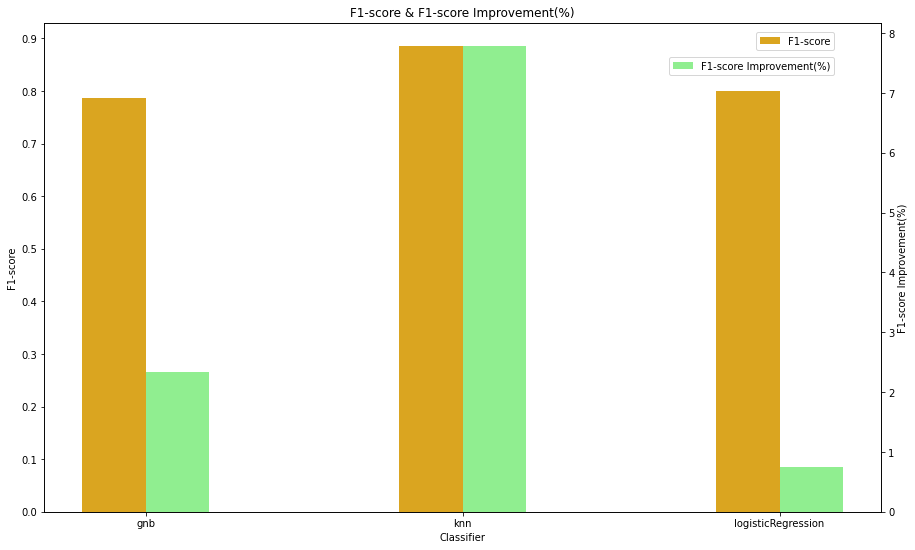

In [94]:
# plot f1 scores
plotBarChartDoubleAxes(names, [f1_best_axis, f1_relative_axis], ['goldenrod','lightgreen'],\
            ['F1-score','F1-score Improvement(%)'],\
             'F1-score & F1-score Improvement(%)', 'Classifier', ['F1-score','F1-score Improvement(%)'])

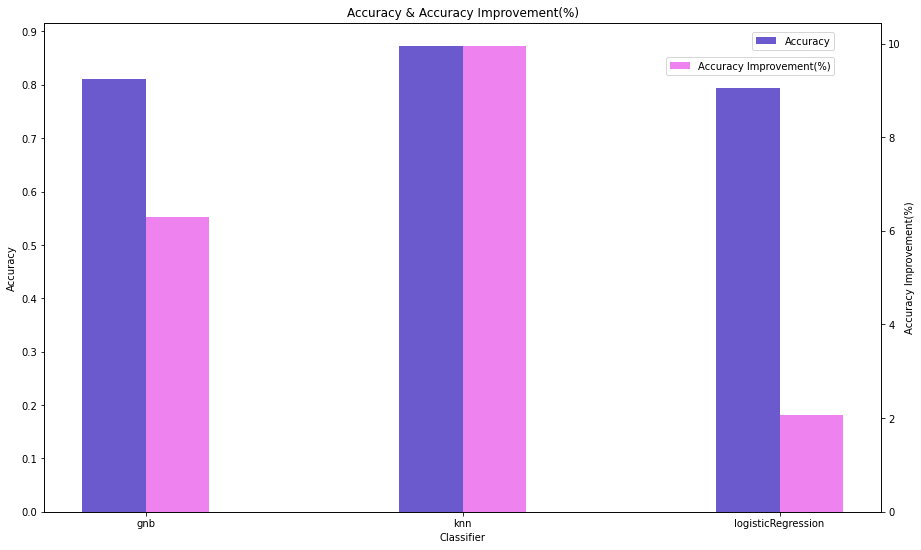

In [95]:
# plot accuracy
plotBarChartDoubleAxes(names, [accuracy_best_axis, accuracy_relative_axis], ['slateblue','violet'],\
            ['Accuracy','Accuracy Improvement(%)'],\
             'Accuracy & Accuracy Improvement(%)', 'Classifier', ['Accuracy','Accuracy Improvement(%)'])


### Σχολιασμός

Αρχικά, παρατηρούμε ότι όλοι οι ταξινομητές βελτιώθηκαν ως προς την επίδοση τους και στις δύο μετρικές με τις διαδικασίες προεπεξεργασίας και αναζήτησης υπερπαραμέτρων. 

**Επίδοση**

Όσον αφορά την επίδοση ως απόλυτο νούμερο, μετά την βελτιστοποίηση ο καλύτερος ταξινομητής είναι ο Knn. Συγκεκριμένα, πετυχαίνει την καλύτερη επίδοση και για τις δύο μετρικές και με αρκετά μεγάλη διαφορά σε σχέση με τους προηγούμενους. Σε δέυτερη θέση για το F1-score έρχεται ο Logistic Regression, ενώ για το Accuracy ο GNB. Ωστόσο και για τις δύο μετρικές, ο δεύτερος και ο τρίτος ταξινομητής απέχουν λίγο σε επίδοση.


**Επίδοση σε σχέση με τους Out-of-the-Box**

Όσον αφορά την βελτίωση της επίδοσης σε σχέση με τις ootb εκδοχές, πάλι είναι πρώτος ο Knn με βελτίωση γύρω στο 7.8% και 10% αντίστοιχα για το F1-score και το Accuracy. Λαμβάνοντας μάλιστα υπόψιν ότι είναι ο ταξινομητής που χρειάστηκε τον λιγότερο χρόνο για την έυρεση των υπερπαραμέτρων, μπορούμε να υποθέσουμε ότι έχει και άλλο περιθώριο βελτίωσης με μιά πιο εξαντλητική αναζήτηση ή μια πιο ισχυρή και έξυπνη μέθοδο βελτιστοποίησης. 

Όσον αφορά τον GNB, παρουσιάζει υπολογίσιμη βελτίωση (ειδικά, μάλιστα για το Accuracy) με την βελτιστοποίση υπερπαραμέτρων, ενώ παίρνει σημαντικά περισσότερο χρόνο από τον Knn για την βελτιστοποίση των παραμέτρων (4 με 5 φορές παραπάνω).

Ο ταξινομητής Logistic Regression, είναι χαρακτηριστικό ότι έχει ελάχιστη βελτίωση (λιγότερο από 1%) σε σχέση με την out of the box εκδοχή του. Άλλωστε είναι αυτός στον οποίο χρειάστηκε με διαφορά ο περισσότερος χρόνος για την βελτιστοποίηση υπερπαραμέτρων, συνεπώς συγκριτικά με τους υπόλοιπους είναι ο χειρότερος από όλες τις απόψεις.

**Ο καλύτερος Ταξινομητής**

Από τα αποτελέσματά μας προκύπτει ξεκάθαρα ότι ο καλύτερος ταξινομητής για το πρόβλημα που εξετάσαμε είναι ο Knn. Πράγματι, με τον Knn πετύχαμε τις καλύτερες επιδόσεις και για τις δύο μετρικές, ενώ για για την βελτιστοποίηση τον υπερπαραμέτρων του ξοδέξαμε τον λιγότερο χρόνο. 

Σχετικά με την επιτυχία του Knn μπορούμε να υποθέσουμε ότι σχετίζεται με την φύση του προβλήματος. Θα μπορούσαμε, δηλαδή να σκεφτούμε ότι ένα υλικό (πέτρωμα ή μέταλλο) παρουσιάζει συνήθως πολύ κοντινές νούμερα στις τιμές ενέργειας που εξετάζουμε με κάποιο άλλο υλικό ίδιας φύσης (μέταλλο με μέταλλο ή πέτρωμα με πέτρωμα) και συνεπώς η ταξινόμηση σε σχέση με τους πλησιέστερους γείτονες έχει καλό αποτέλεσμα. Αξίζει, μάλιστα να σημειωθεί ότι κατά την βελτιστοποίηση υπερπαραμέτρων καταλήξαμε για όλες τις περιπτώσεις σε k=1, συνεπώς, για το συγκεκριμένο πρόβλημα, έχει ιδιαίτερη σημασία να εντοπίσουμε το _ένα_ υλικό με την κοντινότερη συμπεριφορά, ως προς την αντανάκλαση συχνοτήτων και να ταξινομήσουμε σύμφωνα με αυτό.

**Εκτύπωση Confusion Matrices**

In [96]:
import seaborn as sns

**_Confusion Matrix του Ταξινομητή με την Χειρότερη Ορθότητα_** (Logistic Regression):

logisticRegression
AxesSubplot(0.125,0.125;0.62x0.755)


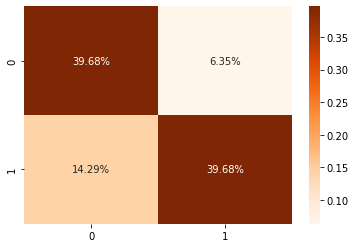

In [97]:
ind = list(accuracy_scores_best.values()).index(min(list(accuracy_scores_best.values())))
name = list(accuracy_scores_best.keys())[ind]
print(name)

print(sns.heatmap(cnf_matrices[name]/np.sum(cnf_matrices[name]), annot=True, fmt='.2%', cmap='Oranges'))

**_Confusion Matrix του Ταξινομητή με την Καλύτερη Ορθότητα_** (Knn):

knn
AxesSubplot(0.125,0.125;0.62x0.755)


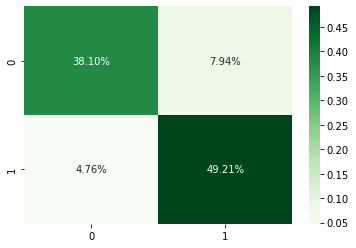

In [98]:
ind = list(accuracy_scores_best.values()).index(max(list(accuracy_scores_best.values())))
name = list(accuracy_scores_best.keys())[ind]
print(name)

print(sns.heatmap(cnf_matrices[name]/np.sum(cnf_matrices[name]), annot=True, fmt='.2%', cmap='Greens'))